In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('StudentsData').sheet1


In [ ]:
rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})

df


,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0
5,6.0,61.0
6,7.0,71.0
7,8.0,81.0
8,9.0,91.0
9,10.0,101.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# To scale
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[['INPUT']].values
Y = df[['OUTPUT']].values

X


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.33,random_state=33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='rmsprop',loss = 'mse')
model.fit(X_train1,y_train,epochs=2200)



Epoch 1/2200
1/1 [==============================] - 1s 594ms/step - loss: 13058.3369
Epoch 2/2200
1/1 [==============================] - 0s 10ms/step - loss: 13055.8770
Epoch 3/2200
1/1 [==============================] - 0s 11ms/step - loss: 13054.1152
Epoch 4/2200
1/1 [==============================] - 0s 7ms/step - loss: 13052.6543
Epoch 5/2200
1/1 [==============================] - 0s 13ms/step - loss: 13051.3682
Epoch 6/2200
1/1 [==============================] - 0s 13ms/step - loss: 13050.2051
Epoch 7/2200
1/1 [==============================] - 0s 9ms/step - loss: 13049.1338
Epoch 8/2200
1/1 [==============================] - 0s 8ms/step - loss: 13048.1230
Epoch 9/2200
1/1 [==============================] - 0s 8ms/step - loss: 13047.1582
Epoch 10/2200
1/1 [==============================] - 0s 8ms/step - loss: 13046.2256
Epoch 11/2200
1/1 [==============================] - 0s 7ms/step - loss: 13045.3320
Epoch 12/2200
1/1 [==============================] - 0s 7ms/step - loss: 13044.

<Axes: >

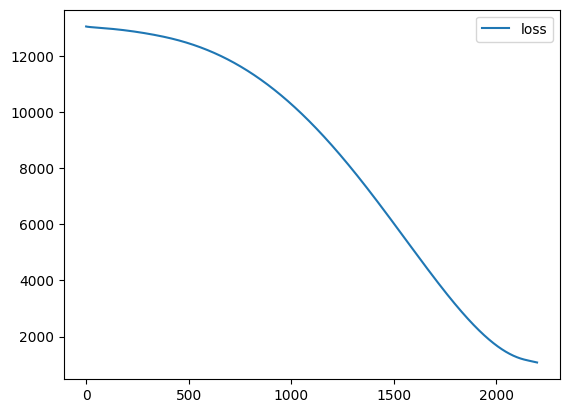

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 36ms/step - loss: 1410.5975


1410.5975341796875

In [ ]:
X_n1 = [[20]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)


1/1 [==============================] - 0s 146ms/step


array([[143.352]], dtype=float32)